In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

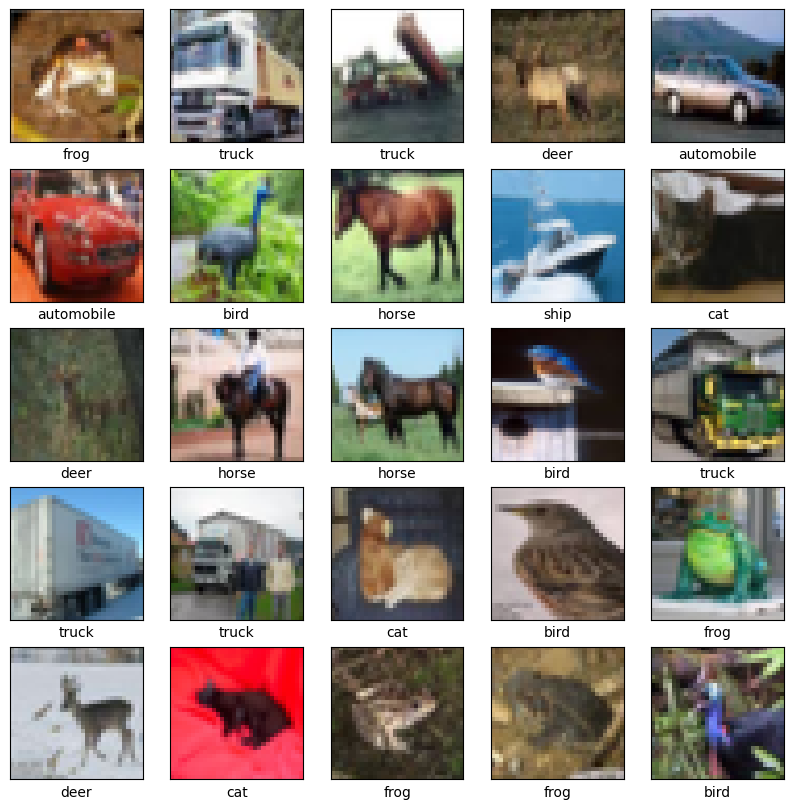

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3408 - loss: 1.7611 - val_accuracy: 0.5066 - val_loss: 1.3717
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5649 - loss: 1.2236 - val_accuracy: 0.5950 - val_loss: 1.1341
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6303 - loss: 1.0444 - val_accuracy: 0.6407 - val_loss: 1.0180
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6775 - loss: 0.9237 - val_accuracy: 0.6628 - val_loss: 0.9544
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6999 - loss: 0.8578 - val_accuracy: 0.6845 - val_loss: 0.9000
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7207 - loss: 0.7911 - val_accuracy: 0.6832 - val_loss: 0.9152
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7433 - loss: 0.7437 - val_accuracy: 0.6967 - val_loss: 0.8650
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7537 - loss: 0.7050 - 

313/313 - 0s - 1ms/step - accuracy: 0.7110 - loss: 0.8653


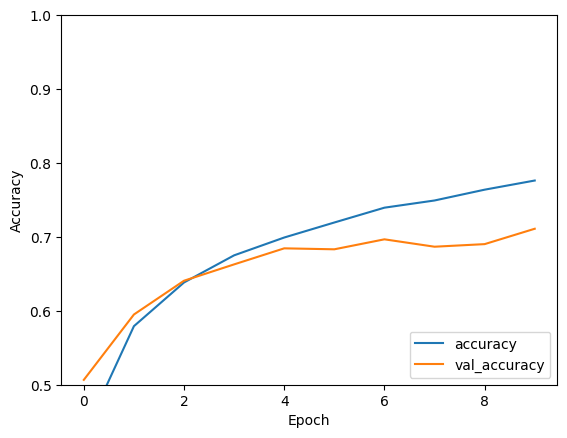

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
print(test_acc)

0.7110000252723694


Found 3 files belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


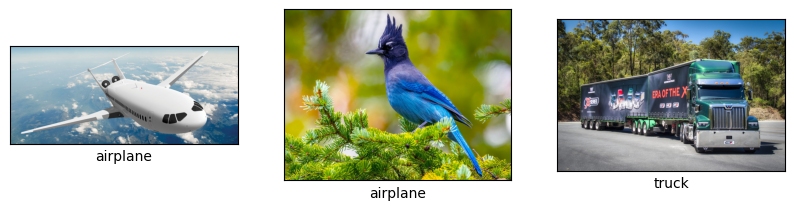

In [15]:
import PIL
import PIL.Image

# Inference
imgs = tf.keras.utils.image_dataset_from_directory(
    'Images/', image_size=(32, 32), batch_size=1, shuffle=False
)
predictions = model.predict(imgs, verbose=1)
predictions = tf.nn.softmax(predictions)
predictions = predictions.numpy()

airplane = PIL.Image.open('Images/airplane/airplane.jpg')
bird = PIL.Image.open('Images/bird/bird.jpg')
truck = PIL.Image.open('Images/truck/truck.jpg')

imgs = [airplane, bird, truck]

# Displaying the images amd their predictions
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[i])
    plt.xlabel(class_names[predictions[i].argmax()])
plt.show()

In [ ]:
wget https://tinyurl.com/DLP-Week-9-Competition-Dataset


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# ResNet-9 plain (custom)
resNet = models.Sequential()

# Itinial Conv layer
resNet.add(layers.Conv2D(filters=64, kernel_size=(7,7), padding= 'same', strides=(2, 2), activation='relu', input_shape=(224, 224, 3)))
resNet.add(layers.MaxPooling2D((2, 2)))

resNet.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding= 'same', activation='relu'))
resNet.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding= 'same', activation='relu'))

resNet.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding= 'same',  strides=(2, 2), activation='relu'))
resNet.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding= 'same', activation='relu'))

resNet.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding= 'same',  strides=(2, 2), activation='relu'))
resNet.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding= 'same', activation='relu'))

resNet.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding= 'same',  strides=(2, 2), activation='relu'))
resNet.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding= 'same', activation='relu'))

resNet.add(layers.GlobalAveragePooling2D())
resNet.add(layers.Dense(10))

resNet.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 112, 112, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,735,114 (18.06 MB)

 Trainable params: 4,735,114 (18.06 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
resNet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = resNet.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.1927 - loss: 2.0665 - val_accuracy: 0.3787 - val_loss: 1.6232
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.3942 - loss: 1.5968 - val_accuracy: 0.4799 - val_loss: 1.4157
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.4977 - loss: 1.3678 - val_accuracy: 0.5191 - val_loss: 1.3336
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.5493 - loss: 1.2508 - val_accuracy: 0.5569 - val_loss: 1.2627
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.5950 - loss: 1.1260 - val_accuracy: 0.5718 - val_loss: 1.1932
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.6282 - loss: 1.0422 - val_accuracy: 0.5863 - val_loss: 1.1795
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.6577 - loss: 0.9649 - val_accuracy: 0.5878 - val_loss: 1.1923
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.6841 

313/313 - 2s - 5ms/step - accuracy: 0.6273 - loss: 1.1514


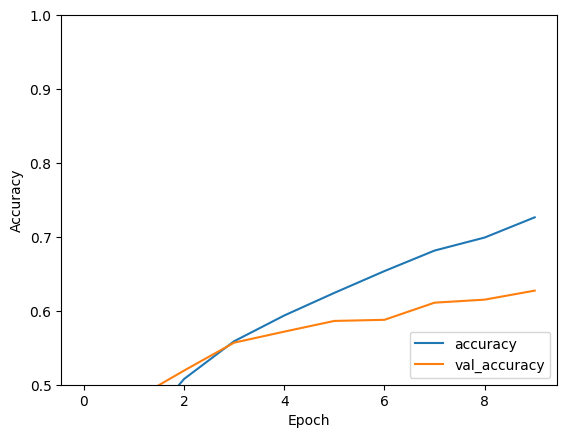

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = resNet.evaluate(test_images,  test_labels, verbose=2)

In [17]:
print(test_acc)

0.6273000240325928


Found 3 files belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


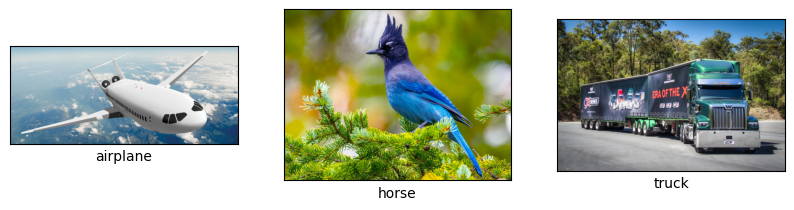

In [33]:
import PIL
import PIL.Image

# Inference
imgs = tf.keras.utils.image_dataset_from_directory(
    'Images/', image_size=(32, 32), batch_size=1, shuffle=False
)
predictions = resNet.predict(imgs, verbose=1)
predictions = tf.nn.softmax(predictions)
predictions = predictions.numpy()

airplane = PIL.Image.open('Images/airplane/airplane.jpg')
bird = PIL.Image.open('Images/bird/bird.jpg')
truck = PIL.Image.open('Images/truck/truck.jpg')

imgs = [airplane, bird, truck]

# Displaying the images amd their predictions
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[i])
    plt.xlabel(class_names[predictions[i].argmax()])
plt.show()